# **Описание кейса: ИИ оптимизирует производство атомного топлива**

Производственные процессы на больших предприятиях - это не только позитивность в отчетах на заседаниях министерства тяжелой промышленности, но и прежде всего работа людьми, с людьми и для людей. Однако это означает довольно высокий процент ошибок вследствие человеческого фактора, а на производстве это может повлечь за собой не только брак продукции, но и человеческие жертвы. Командам предлагается с помощью ИИ оптимизировать алгоритм загрузки и работы прессов и печей в производстве топлива из редких цветных металлов.

https://lodmedia.hb.bizmrg.com/cases/1058016/%D0%A0%D0%BE%D1%81%D0%B0%D1%82%D0%BE%D0%BC%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%D0%BD%D0%B0%D1%80%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9.pdf

**Задача:**

Решение задачи представляет собой готовый алгоритм, выдающий результат в виде графика загрузки.

**Ограничения на технологии:**

Программы и библиотеки с открытым исходным кодом (open source) и общедоступные публичные данные. Используемый стек технологий должен обеспечить автономность решения (возможность использования без сети «Интернет») и поддерживать платформы Windows, Linux.

**🛑 Запрещается:**

-	Автоматизированные средства оценивания точности работы предложенных участниками алгоритмов не применяются.
Итоговая оценка определяется как итоговый балл жюри.

In [93]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
PATH_TO_DATASETS = os.path.join(os.getcwd(), "datasets")

In [3]:
PATH_TO_DATASETS

'/content/datasets'

In [4]:
json_files = []
for file in os.listdir(PATH_TO_DATASETS):
    with open(os.path.join(PATH_TO_DATASETS, file)) as json_data:
        json_files.append(json.load(json_data))

In [5]:
operations = []
for file in json_files:
    for oven in file["ovens"]:
        operations.extend(oven["operations"])
set(operations)

{'kovka', 'otzhig', 'prokat'}

In [6]:
def flatten_serie(one_serie):
    row = {}
    row["series_type"] = one_serie["operations"][1]["name"]
    row["nagrev_temp"] = one_serie["temperature"]
    operation_count = []
    for operation in one_serie["operations"]:
        name = operation["name"]
        time = operation["timing"]

        operation_count.append(name)
        if operation_count.count(name) > 1 or name == "kovka":
            name = f"{name}_{operation_count.count(name)}"
        row[f"{name}_time"] = time
    return row


In [7]:
series_operations = []
for file in json_files:
    data = []
    for serie in file["series"]:
        data.append(flatten_serie(serie))
jobs = pd.DataFrame.from_dict(data)


In [8]:
jobs.describe()

,nagrev_temp,nagrev_time,prokat_time,otzhig_time,kovka_1_time,kovka_2_time,kovka_3_time
count,2299.000000,2299.000000,807.0,760.0,732.000000,491.000000,243.000000
mean,1017.725098,166.107873,15.0,15.0,15.075137,14.704684,15.020576
std,43.260310,78.748018,0.0,0.0,3.969940,4.073854,4.202959
min,950.000000,30.000000,15.0,15.0,10.000000,10.000000,10.000000
25%,980.000000,96.000000,15.0,15.0,10.000000,10.000000,10.000000
50%,1020.000000,166.000000,15.0,15.0,15.000000,15.000000,15.000000
75%,1050.000000,235.000000,15.0,15.0,20.000000,20.000000,20.000000
max,1090.000000,300.000000,15.0,15.0,20.000000,20.000000,20.000000


In [9]:
jobs.head(10)

,series_type,nagrev_temp,nagrev_time,prokat_time,otzhig_time,kovka_1_time,kovka_2_time,kovka_3_time
0,prokat,980,82,15.0,NaN,NaN,NaN,NaN
1,prokat,1040,213,15.0,NaN,NaN,NaN,NaN
2,otzhig,1070,71,NaN,15.0,NaN,NaN,NaN
3,kovka,1000,232,NaN,NaN,10.0,10.0,20.0
4,prokat,1080,245,15.0,NaN,NaN,NaN,NaN
5,otzhig,970,62,NaN,15.0,NaN,NaN,NaN
6,kovka,1080,76,NaN,NaN,15.0,NaN,NaN
7,otzhig,980,96,NaN,15.0,NaN,NaN,NaN
8,prokat,1020,300,15.0,NaN,NaN,NaN,NaN
9,prokat,990,125,15.0,NaN,NaN,NaN,NaN


In [10]:
jobs.groupby(["nagrev_temp"])["nagrev_time"].count()#.drop(columns=["kovka_2_time", "kovka_3_time"])

nagrev_temp
950     184
960     163
970     144
980     166
990     141
1000    161
1010    149
1020    155
1030    175
1040    158
1050    139
1060    128
1070    158
1080    135
1090    143
Name: nagrev_time, dtype: int64

In [11]:
jobs.shape

(2299, 8)

In [12]:
# Заполняем NaN значением "0":
jobs['prokat_time'] = jobs['prokat_time'].fillna(0)

In [13]:
jobs = jobs.fillna(0)

In [14]:
jobs.head(10)

,series_type,nagrev_temp,nagrev_time,prokat_time,otzhig_time,kovka_1_time,kovka_2_time,kovka_3_time
0,prokat,980,82,15.0,0.0,0.0,0.0,0.0
1,prokat,1040,213,15.0,0.0,0.0,0.0,0.0
2,otzhig,1070,71,0.0,15.0,0.0,0.0,0.0
3,kovka,1000,232,0.0,0.0,10.0,10.0,20.0
4,prokat,1080,245,15.0,0.0,0.0,0.0,0.0
5,otzhig,970,62,0.0,15.0,0.0,0.0,0.0
6,kovka,1080,76,0.0,0.0,15.0,0.0,0.0
7,otzhig,980,96,0.0,15.0,0.0,0.0,0.0
8,prokat,1020,300,15.0,0.0,0.0,0.0,0.0
9,prokat,990,125,15.0,0.0,0.0,0.0,0.0


array([184, 175, 166, 163, 161, 158, 155, 149, 144, 143, 141, 139, 135,
       128])

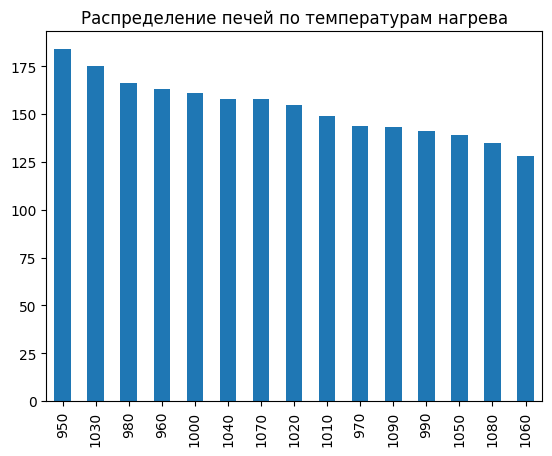

In [15]:
jobs['nagrev_temp'].value_counts().plot(kind="bar",
                                        title="Распределение печей по температурам нагрева")
jobs['nagrev_temp'].value_counts().unique()

In [16]:
round(jobs['nagrev_temp'].value_counts()/7,0)

950     26.0
1030    25.0
980     24.0
960     23.0
1000    23.0
1040    23.0
1070    23.0
1020    22.0
1010    21.0
970     21.0
1090    20.0
990     20.0
1050    20.0
1080    19.0
1060    18.0
Name: nagrev_temp, dtype: float64

In [17]:
jobs['total_time']=jobs['nagrev_time']+jobs['prokat_time']+jobs['otzhig_time']+jobs['kovka_1_time']+jobs['kovka_2_time']+jobs['kovka_3_time']
jobs.head(10).sort_values(by='total_time', ascending=False)

,series_type,nagrev_temp,nagrev_time,prokat_time,otzhig_time,kovka_1_time,kovka_2_time,kovka_3_time,total_time
8,prokat,1020,300,15.0,0.0,0.0,0.0,0.0,315.0
3,kovka,1000,232,0.0,0.0,10.0,10.0,20.0,272.0
4,prokat,1080,245,15.0,0.0,0.0,0.0,0.0,260.0
1,prokat,1040,213,15.0,0.0,0.0,0.0,0.0,228.0
9,prokat,990,125,15.0,0.0,0.0,0.0,0.0,140.0
7,otzhig,980,96,0.0,15.0,0.0,0.0,0.0,111.0
0,prokat,980,82,15.0,0.0,0.0,0.0,0.0,97.0
6,kovka,1080,76,0.0,0.0,15.0,0.0,0.0,91.0
2,otzhig,1070,71,0.0,15.0,0.0,0.0,0.0,86.0
5,otzhig,970,62,0.0,15.0,0.0,0.0,0.0,77.0


In [18]:
jobs_series_total = jobs.groupby(["series_type", "total_time"])["nagrev_temp"].value_counts().sort_values(ascending=False)

jobs_series_total.head(20)

series_type  total_time  nagrev_temp
prokat       186.0       1050           6
otzhig       77.0        970            4
kovka        181.0       1060           4
prokat       112.0       1030           4
             222.0       1070           4
otzhig       92.0        980            4
kovka        186.0       1030           4
prokat       228.0       1040           4
kovka        184.0       1040           4
prokat       171.0       1070           4
             160.0       1040           4
kovka        269.0       960            4
prokat       260.0       1080           4
             59.0        1030           4
             285.0       1070           4
kovka        322.0       990            4
             60.0        1000           4
otzhig       123.0       980            3
             122.0       1090           3
prokat       89.0        1000           3
Name: nagrev_temp, dtype: int64

In [19]:
jobs_nagrev_total = jobs.groupby(["nagrev_temp"])["total_time"].value_counts().sort_values(ascending=False)

jobs_nagrev_total.head(10)

nagrev_temp  total_time
1070         171.0         6
970          77.0          6
1050         186.0         6
960          269.0         6
             267.0         6
950          68.0          5
1000         60.0          5
980          92.0          5
1030         166.0         5
1040         184.0         5
Name: total_time, dtype: int64

In [20]:
jobs_srs_type = jobs.groupby(["series_type"])["total_time"].value_counts().sort_values(ascending=False)

jobs_srs_type.head(10)

series_type  total_time
prokat       171.0         10
kovka        283.0          9
prokat       285.0          9
otzhig       232.0          9
prokat       102.0          9
             294.0          9
otzhig       92.0           8
prokat       260.0          8
             203.0          8
             172.0          8
Name: total_time, dtype: int64

<Axes: xlabel='Виды обработки', ylabel='Количество нагревов (разы)'>

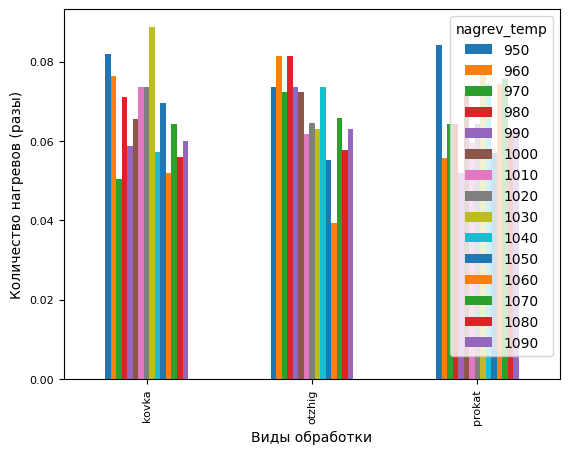

In [21]:
# визуализация статистика распределения температур по видам обработки:
rps_podrod = pd.crosstab(jobs['series_type'], jobs['nagrev_temp'])
rps_podrod = rps_podrod.div(rps_podrod.sum(1), axis=0)

# график в десятичной шкале:
rps_podrod.plot.bar(log = False,
                    xlabel="Виды обработки",
                    ylabel='Количество нагревов (разы)',
                    fontsize=8,
                    legend=True)

In [22]:
df_for_model=jobs[['series_type', 'nagrev_temp','total_time']]
df_for_model.sort_values(by='total_time', ascending=False).head(10)

,series_type,nagrev_temp,total_time
928,kovka,1030,347.0
2122,kovka,980,346.0
420,kovka,990,346.0
2261,kovka,950,341.0
246,kovka,1000,339.0
1362,kovka,1030,333.0
1391,kovka,1080,333.0
1469,kovka,980,332.0
383,kovka,950,331.0
917,kovka,960,329.0


In [38]:
# Разметка датасета:
df_for_model['label'] = ""
df_for_model.head(5)

<ipython-input-38-6f1b64457982>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['label'] = ""


,series_type,nagrev_temp,total_time,rate_effect,label
0,prokat,980,97.0,0.52,
1,prokat,1040,228.0,1.23,
2,otzhig,1070,86.0,0.46,
3,kovka,1000,272.0,1.46,
4,prokat,1080,260.0,1.40,


In [39]:
def assign_ethnicity(row):
    if row['series_type'] == 'prokat':
        return 1
    elif row['series_type'] == 'kovka':
        return 2
    else:
        return 3

In [40]:
df_for_model['label'] = df_for_model.apply(assign_ethnicity, axis=1)
df_for_model.head(5)
df_for_model.sort_values(by='total_time', ascending=False).head(10)

<ipython-input-40-fc0f4ab39015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['label'] = df_for_model.apply(assign_ethnicity, axis=1)


,series_type,nagrev_temp,total_time,rate_effect,label
928,kovka,1030,347.0,1.87,2
2122,kovka,980,346.0,1.86,2
420,kovka,990,346.0,1.86,2
2261,kovka,950,341.0,1.83,2
246,kovka,1000,339.0,1.82,2
1362,kovka,1030,333.0,1.79,2
1391,kovka,1080,333.0,1.79,2
1469,kovka,980,332.0,1.78,2
383,kovka,950,331.0,1.78,2
917,kovka,960,329.0,1.77,2


In [74]:
# Создаем константу фонд астрономического времени работы 7 печей на участке
day_time_total = 24*60*7

# Определеяем среднее и медиану для признака 'TOTAL_time' в расчете на один день
day_period_mean = round(df_for_model['total_time'].mean(),0)
day_period_med = round(df_for_model['total_time'].median(),0)

# Количество периодов загрузки 7-ми печей за ОДИН день:
period_load_ovens_mean = round(day_time_total/day_period_mean,0)
period_load_ovens_med = round(day_time_total/day_period_med,0)

# Количество периодов загрузки одной печи за ОДИН день:
period_load_oven_mean = round(day_time_total/day_period_mean/7,0)
period_load_oven_med = round(day_time_total/day_period_med/7,0)

print ('фонд астрономического времени работы 7 печей на участке за один день, минуты: ', day_time_total)
print ('среднее и медиану для признака TOTAL_time в расчете на один день: \n', day_period_mean, day_period_med)
print ('количество периодов загрузки 7-ми печей за один день: \n', period_load_ovens_mean, period_load_ovens_med)
print ('количество периодов загрузки 1-ной печи за один день: \n', period_load_oven_mean, period_load_oven_med)

фонд астрономического времени работы 7 печей на участке за один день, минуты:  10080
среднее и медиану для признака TOTAL_time в расчете на один день: 
 186.0 186.0
количество периодов загрузки 7-ми печей за один день: 
 54.0 54.0
количество периодов загрузки 1-ной печи за один день: 
 8.0 8.0


In [75]:
# Создаем признак 'rate_effect' и записываем в него :
df_for_model['rate_effect'] = round(df_for_model['total_time']/day_period_med,2)
df_for_model.head(6).sort_values(by='rate_effect',ascending=False)

<ipython-input-75-5ca60524af85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['rate_effect'] = round(df_for_model['total_time']/day_period_med,2)


,series_type,nagrev_temp,total_time,rate_effect,label
3,kovka,1000,272.0,1.46,2
4,prokat,1080,260.0,1.40,1
1,prokat,1040,228.0,1.23,1
0,prokat,980,97.0,0.52,1
2,otzhig,1070,86.0,0.46,3
5,otzhig,970,77.0,0.41,3


In [76]:
df_for_model_groups = df_for_model.groupby(["series_type"])["nagrev_temp", "rate_effect"].value_counts().sort_values(ascending=False)

df_for_model_groups.head(7)

<ipython-input-76-7dee99d23836>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_for_model_groups = df_for_model.groupby(["series_type"])["nagrev_temp", "rate_effect"].value_counts().sort_values(ascending=False)


series_type  nagrev_temp  rate_effect
prokat       1030         0.32           6
             1050         1.00           6
             1070         1.53           5
                          1.19           5
kovka        1040         0.99           5
             990          1.73           4
prokat       1040         1.23           4
dtype: int64

In [91]:
df_for_model_kovka = df_for_model.loc[(df_for_model['label']==2)]
print('количество нагревов под ковку: ', len(df_for_model_kovka))

df_for_model_kovka.head(14).sort_values(by=['total_time', 'nagrev_temp'], ascending=False)

количество нагревов под ковку:  732


,series_type,nagrev_temp,total_time,rate_effect,label
11,kovka,980,326.0,1.75,2
23,kovka,1050,316.0,1.70,2
14,kovka,1040,279.0,1.50,2
22,kovka,970,279.0,1.50,2
3,kovka,1000,272.0,1.46,2
42,kovka,1090,254.0,1.37,2
25,kovka,1030,252.0,1.35,2
37,kovka,1040,184.0,0.99,2
30,kovka,1060,175.0,0.94,2
18,kovka,1090,174.0,0.94,2


In [90]:
df_for_model_prokat = df_for_model.loc[(df_for_model['label']==1)]
print('количество нагревов под прокат: ', len(df_for_model_prokat))

df_for_model_prokat.head(14).sort_values(by=['total_time', 'nagrev_temp'], ascending=False)

количество нагревов под прокат:  807


,series_type,nagrev_temp,total_time,rate_effect,label
8,prokat,1020,315.0,1.69,1
20,prokat,1000,291.0,1.56,1
4,prokat,1080,260.0,1.40,1
17,prokat,970,259.0,1.39,1
12,prokat,980,237.0,1.27,1
1,prokat,1040,228.0,1.23,1
21,prokat,1030,200.0,1.08,1
31,prokat,1050,186.0,1.00,1
9,prokat,990,140.0,0.75,1
28,prokat,1060,138.0,0.74,1


In [89]:
df_for_model_otzhig = df_for_model.loc[(df_for_model['label']==3)]
print('количество нагревов под прокат: ', len(df_for_model_otzhig))

df_for_model_otzhig.head(14).sort_values(by=['total_time', 'nagrev_temp'], ascending=False)

количество нагревов под прокат:  760


,series_type,nagrev_temp,total_time,rate_effect,label
10,otzhig,960,314.0,1.69,3
44,otzhig,1020,313.0,1.68,3
15,otzhig,1020,283.0,1.52,3
13,otzhig,1020,236.0,1.27,3
58,otzhig,1090,133.0,0.72,3
55,otzhig,980,127.0,0.68,3
16,otzhig,1090,122.0,0.66,3
7,otzhig,980,111.0,0.60,3
24,otzhig,960,111.0,0.60,3
40,otzhig,1010,104.0,0.56,3


In [95]:
# сохраняем датасеты в файлы для последующего обучения модели
df_for_model_otzhig.to_csv("df_for_model_otzhig.csv", index=True, sep=";", decimal=",", encoding="windows-1251")

In [97]:
# сохраняем датасеты в файлы для последующего тестирования обученной модели
df_for_model_prokat.to_csv("df_for_model_prokat.csv", index=True, sep=";", decimal=",", encoding="windows-1251")
df_for_model_kovka.to_csv("df_for_model_kovka.csv", index=True, sep=";", decimal=",", encoding="windows-1251")

In [96]:
# проверка сохранения файла с датасетом:
df_for_model_otzhig_test = pd.read_csv("df_for_model_otzhig.csv", sep=";", decimal=",", encoding="windows-1251")
df_for_model_otzhig_test.shape

(760, 6)

# **СТОП-КОД здесь**

ПЛАНЫ (то, на что не хватило времени):
- сортировка по рейтингу в каждой из трех таблиц для выбора семерок с одинаковой температурой
- после выбора 7-ки загружается 7-мь печей и готовится следующая загрузка
- при каждой следующей загрузке сравнивается плановое время промежутка загрузки с фактическим временем, требующимся на нагрев новой серии. Возможно, и так видно из данных, в один плановый промежуток загрузить несколько серий последовательно, для которых в сумме фактическое время нагрева будет равно или близко к плановому временному промежутку.
- визуализация распределения


# **ПОДВАЛ заготовок**

<Axes: xlabel='Виды обработки', ylabel='Рейтинг температур нагрева (разы)'>

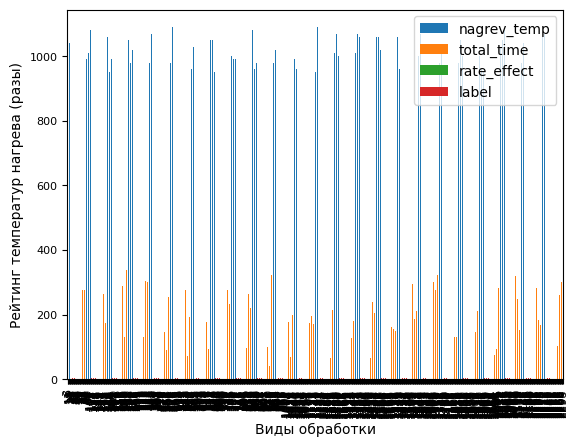

In [65]:
df_for_model_kovka.plot.bar(log = False,
                             xlabel="Виды обработки",
                             ylabel='Рейтинг температур нагрева (разы)',
                             fontsize=8,
                             legend=True)

In [ ]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
def function_to_minimize(x):
    return x[0] + 4 * x[0]**2 + 10 + 30*x[1]**2

In [ ]:
# Симплекс-метод
x0 = np.array([1, 3])
res = minimize(function_to_minimize, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
res

In [ ]:
# BFGS
res = minimize(function_to_minimize, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})
res